In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
np.seterr(divide = 'ignore') # to ignore Runtime warning msgs
# np.seterr(divide = 'warn')  # to turn on Runtime warning msgs
np.random.seed(42)

## 1. Preprocessing Data

In [3]:
X, Y = datasets.make_blobs(n_samples=100, n_features=3, centers=5, cluster_std=1.05, random_state=3)

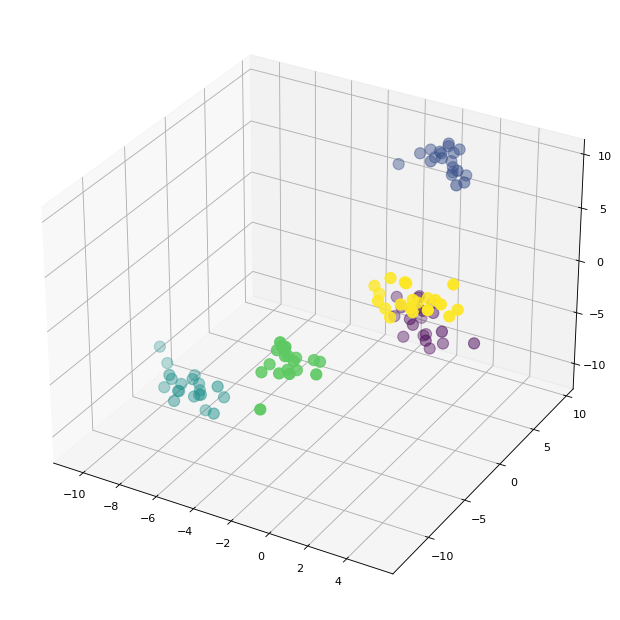

In [4]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y, s=100)
plt.show()

In [5]:
len(Y)

100

In [6]:
# one-hot encode labels
def one_hot(Y):
    num_samples = len(Y)
    y_ohe = np.zeros((num_samples, 5))
    y_ohe[np.arange(num_samples), Y] = 1
    return y_ohe

In [7]:
Y_ohe = one_hot(Y)
print(Y.shape, Y_ohe.shape)
print(Y[0], Y_ohe[0])

(100,) (100, 5)
4 [0. 0. 0. 0. 1.]


## 2. Setting parameters

In [8]:
learning_rate = 0.1
num_epochs = 10
batch_size = 10
num_features = 3
num_classes = 5

In [9]:
def initialize_weights(num_features, num_classes):
    W = np.random.rand(num_features, num_classes)
    B = np.random.rand(num_classes)
    return W, B 

## 3. Helper functions

In [10]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=-1, keepdims=True)

In [11]:
def predict(X, W, B):
    z = np.dot(X, W) + B
    softmax_prob =  softmax(z)
    y_hat = np.argmax(softmax_prob, axis=-1)
    return softmax_prob, y_hat

In [12]:
def loss(softmax_prob, Y): # this is Y, not Y_ohe
        return -np.mean(np.sum(Y * np.log(softmax_prob), axis=-1))

In [13]:
def accuracy(Y_hat, Y_ohe):
    Y = np.argmax(Y_ohe, axis=-1)
    return np.mean(Y == Y_hat)

In [14]:
def partial_derivative(softmax_prob, X, Y):
    dW = np.dot(X.T, softmax_prob - Y)/ len(X)   # dL/dW = (y_hat - y_true)*X
    dB = np.mean(softmax_prob - Y, axis=0)
    return  dW, dB

In [15]:
def update_hyperparameters(W, B, dW, dB, learning_rate):
    W -= learning_rate * dW
    B -= learning_rate * dB
    return W, B

## 4. Training

In [21]:
def train(X, Y, num_features, num_classes, learning_rate=0.1, num_epochs=100, batch_size=32):
    num_batches = len(X) // batch_size
    loss_list, acc_list = [], []
    Y_pred = []
    
    W, B = initialize_weights(num_features, num_classes)
    
    for epoch in range(num_epochs):
        idx = np.random.permutation(len(X))
        for i in range(num_batches):
            batch_idx = idx[i * batch_size:(i+1) * batch_size]
            X_batch, Y_batch = X[batch_idx], Y[batch_idx]
            
            softmax_prob, Y_hat = predict(X, W, B)

            dW, dB = partial_derivative(softmax_prob, X, Y)
            W, B =  update_hyperparameters(W, B, dW, dB, learning_rate)
        
        Y_pred += list(Y_hat)
        Loss = loss(softmax_prob, Y)
        Acc =  accuracy(Y_pred, Y)
        loss_list.append(Loss)
        acc_list.append(Acc)
            
    return  loss_list, acc_list
            


In [22]:
loss_list, acc_list = train(X, Y_ohe, num_features, num_classes, learning_rate, num_epochs, batch_size)

C:\Users\natas\AppData\Local\Temp\ipykernel_11684\1941736727.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.mean(Y == Y_hat)


## 5. Visualization

In [23]:
def plot_(history, type_):
    plt.plot(history)
    plt.title(f'{type_} vs num_iteration')
    plt.ylabel(type_)
    plt.xlabel('Number of Iterations')
    plt.show()

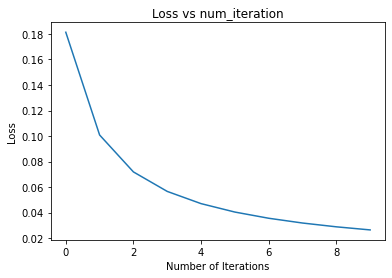

In [24]:
plot_(loss_list, 'Loss')

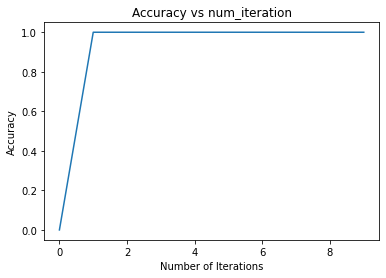

In [25]:
plot_(acc_list, 'Accuracy')